# SPAFF

In [2]:
import mpl_style
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import math
import cython
import tkinter as tk
from PIL import Image, ImageTk
import sys


In [3]:
plt.style.use(mpl_style.style1)

In [4]:
root_dataset = str(sys.argv[1])
root_dataset = "TestCase3_Extrapolate.csv"
root_alt = str(sys.argv[2])
root_alt = 65

In [5]:
class RegimeFunctionBuilder():
    
    """Creates an object that contains the full predicition model from values collected at a single point along a trajectory
    Example - A CFD sim dataset (in csv format) containing information of temperature, pressure, velocity, and momentum at the 
    stagnation point. Create an object as object = RegimeFunctionBuilder(datasetname, regime)
    where the dataset name is a string
    type of the csv file, and the regime is an integer 1 or 2.
    
    For all points along a trajectory 35 km and above use regime 1, and anything below 35 km use regime 2.
    
    
    Copyright Christopher Jessop, DSTL, 21/06/23
    
    """
    
    def __init__(self, dataset, altitude):
        print("*---------------------------------------- Flowfield Approximation Model ----------------------------------------*")
        print()
        self.dataset = pd.read_csv(str(dataset))
        self.name = str(dataset)
        self.altitude = altitude
        
        if altitude >= 35:
            self.regime = 1
        else:
            self.regime = 2
            
            
    def _help(self):
        """ Print functionality of class """
        print(self.__doc__)
        
    


    def params(self):
        
        def mag_calc_vel():
            mag_list_vel = []
            for i in range(0, len(self.dataset)):
                v_x = self.dataset['Velocity Mag:0']
                v_y = self.dataset['Velocity Mag:1']
                v_z = self.dataset['Velocity Mag:2']
                magnitude = np.sqrt(v_x[i]**2 + v_y[i]**2 + v_z[i]**2)
                mag_list_vel.append(magnitude)
                
            return mag_list_vel
            
        def mag_calc_mom():
            mag_list_mom = []
            for i in range(0, len(self.dataset)):
                v_x = self.dataset['Momentum:0']
                v_y = self.dataset['Momentum:1']
                v_z = self.dataset['Momentum:2']
                magnitude = np.sqrt(v_x[i]**2 + v_y[i]**2 + v_z[i]**2)
                mag_list_mom.append(magnitude)
                
            return mag_list_mom
            
            
        self.v1 = mag_calc_vel()
        self.v2 = mag_calc_vel()
        self.m1 = mag_calc_mom()
        self.m2 = mag_calc_mom()
        self.t1 = self.dataset["Temperature"]
        self.t2 = self.dataset["Temperature"]
        self.p1 = self.dataset["Pressure"]
        self.p2 = self.dataset["Pressure"]
        
        self.x = self.dataset["Points:0"]
    
    def Temp_Regime_1(self):
        max_T1 = max(self.t1)
        #print(max_T1)
        val_T_Reg1 = (1.06e-9 * max_T1**3) - (4.251e-5 * max_T1**2) + (1.435 * max_T1) - 85.42
        return val_T_Reg1
    def Temp_Regime_2(self):
        max_T2 = max(self.t2)
        val_T_Reg2 = (7.327e-9 * max_T2**3) - (3.412e-4 * max_T2**2) + (4.954 * max_T2) - 943.9
        return val_T_Reg2
    
    def Press_Regime_1(self):
        max_P1 = max(self.p1)
        val_P_Reg1 = (2.879e-9 * max_P1**3) - (1.847e-4 * max_P1**2) + (7.401 * max_P1) - 49.0
        return val_P_Reg1
    def Press_Regime_2(self):
        max_P2 = max(self.p2)
        val_P_Reg2 = (5.873e-14 * max_P2**5) - (3.62e-9 * max_P2**4) + (8.115e-5 * max_P2**3) - (0.7849 * max_P2**2) + (3105 * max_P2) - 2.892e4
        return val_P_Reg2
    
    def MomMag_Regime_1(self):
        max_M1 = max(self.m1)
        val_M_Reg1 = (-0.206 * max_M1**3) + (2.325 * max_M1**2) - (0.9151 * max_M1) + 6.964
        return val_M_Reg1
    def MomMag_Regime_2(self):
        max_M2 = max(self.m2)
        val_M_Reg2 = (-58.27 * max_M2**3) + (368.8 * max_M2**2) - (161.7 * max_M2) + 318.9
        return val_M_Reg2
    
    
    def VelMag_Regime_1(self):
        max_V1 = max(self.v1)
        val_V_Reg1 = (6.521e-9 * max_V1**3) - (4.757e-5 * max_V1**2) + (0.9593 * max_V1) + 294.9
        return val_V_Reg1
    def VelMag_Regime_2(self):
        max_V2 = max(self.v2)
        val_V_Reg2 = (9.836e-8 * max_V2**3) - (1.04e-3 * max_V2**2) + (3.331 * max_V2) - 750.9
        return val_V_Reg2
    
#     def CalcStagVals(self):
        
#         if self.regime == 1:
#             StagTempR1 = self.Temp_Regime_1()
#             StagPressR1 = self.Press_Regime_1()                        
#             StagVelR1 = self.VelMag_Regime_1()                        
#             StagMomR1 = self.MomMag_Regime_1()
            
#             StagMaxVal = max(self.p1)
#             list_p1 = list(self.p1)
#             list_x = list(self.x)
#             print(StagMaxVal)
#             StagIdX = list_p1.index(StagMaxVal)
#             Stag_Coord = list_x[StagIdX]
# #             StagXIdx_arr = np.array(self.p1)
# #             print(StagXIdx_arr.shape())
            
#             return StagTempR1, StagPressR1, StagVelR1, StagMomR1, StagIdX, Stag_Coord
            
#         elif self.regime == 2:
            
#             StagMaxVal = max(self.p1)
#             list_p1 = list(self.p1)
#             print(StagMaxVal)
#             StagIdX = list_p1.index(StagMaxVal)
#             StagTempR2 = self.Temp_Regime_2()            
#             StagPressR2 = self.Press_Regime_2()            
#             StagVelR2 = self.VelMag_Regime_2()            
#             StagMomR2 = self.MomMag_Regime_2()
            
#             return StagTempR2, StagPressR2, StagVelR2, StagMomR2, StagIdx, Stag_Coord
            
#         else:
#             raise Exception('Regime should be 1 or 2, the given value was: {}'.format(self.regime))

    def CalcStagVals(self):
        self.params()
        if self.regime == 1:
            if self.altitude >= 70:
                StagTempR1 = self.Temp_Regime_1()
                StagPressR1 = (self.Press_Regime_1() / 2.5)                       
                StagVelR1 = self.VelMag_Regime_1()                        
                StagMomR1 = (self.MomMag_Regime_1() / 2.5)
            
            elif self.altitude >= 50:
                StagTempR1 = self.Temp_Regime_1()
                StagPressR1 = (self.Press_Regime_1() / 2.25)                       
                StagVelR1 = self.VelMag_Regime_1()                        
                StagMomR1 = (self.MomMag_Regime_1() / 2.5)
                
            else:
                StagTempR1 = self.Temp_Regime_1()
                StagPressR1 = (self.Press_Regime_1() / 0.275)                       
                StagVelR1 = self.VelMag_Regime_1()                        
                StagMomR1 = (self.MomMag_Regime_1() / 0.3)
            
            StagMaxVal = max(self.p1)
            list_p1 = list(self.p1)
            list_x = list(self.x)
            print(StagMaxVal)
            StagIdX1 = list_p1.index(StagMaxVal)
            Stag_Coord = list_x[StagIdX1]
#             StagXIdx_arr = np.array(self.p1)
#             print(StagXIdx_arr.shape())

            return StagTempR1, StagPressR1, StagVelR1, StagMomR1, StagIdX1, Stag_Coord
            
        elif self.regime == 2:
            if self.altitude >= 30:
                StagTempR2 = (self.Temp_Regime_2() / 1.5)
                StagPressR2 = (self.Press_Regime_2() / 4.0)                       
                StagVelR2 = self.VelMag_Regime_2()                        
                StagMomR2 = (self.MomMag_Regime_2() / 4.5)
                
            elif self.altitude >= 15:
                StagTempR2 = (self.Temp_Regime_2() / 1.5)
                StagPressR2 = (self.Press_Regime_2() / 1.75)                       
                StagVelR2 = self.VelMag_Regime_2()                        
                StagMomR2 = (self.MomMag_Regime_2() / 2.0)
                
            else:
                StagTempR2 = self.Temp_Regime_2()
                StagPressR2 = (self.Press_Regime_2() / 0.625)                       
                StagVelR2 = self.VelMag_Regime_2()                        
                StagMomR2 = (self.MomMag_Regime_2() / 0.6)
            
            
            
            StagMaxVal = max(self.p1)
            list_p1 = list(self.p1)
            list_x = list(self.x)
            print(StagMaxVal)
            StagIdX2 = list_p1.index(StagMaxVal)
            Stag_Coord = list_x[StagIdX2]
            StagTempR2 = self.Temp_Regime_2()            
            StagPressR2 = self.Press_Regime_2()            
            StagVelR2 = self.VelMag_Regime_2()            
            StagMomR2 = self.MomMag_Regime_2()
            
            return StagTempR2, StagPressR2, StagVelR2, StagMomR2, StagIdx2, Stag_Coord
            
        else:
            raise Exception('Regime should be 1 or 2, the given value was: {}'.format(self.regime))
            
            
    def PrintInfo(self):
        self.CalcStagVals()
        ValueTuple = self.CalcStagVals()
        str_Stag_idX = str(np.round(ValueTuple[5], decimals=2))
        str_StagTemp = str(np.round(ValueTuple[0], decimals=2))
        str_StagPress = str(np.round(ValueTuple[1], decimals=2))
        str_StagVel = str(np.round(ValueTuple[2], decimals=2))
        str_StagMom = str(np.round(ValueTuple[3], decimals=2))
        #print(ValueTuple)
        print("The selected dataset is {}".format(self.name))
        print("The stagnation point values for the given trajectory are: ")
        print("Stagnation point X coordinate - " + str_Stag_idX)
        print("Temperature - " + str_StagTemp + " K")
        print("Pressure - " + str_StagPress + " Pa")
        print("Velocity Magnitude - " + str_StagVel + " m/s")
        print("Momentum Magnitude - " + str_StagPress + " ")
        print("For a provided altitude of {}".format(self.altitude) + " km (regime {}".format(self.regime) + ")")
        
    def Predictor(self):
        TempTest, PressureTest, MomTest, VelTest = [], [], [], []
        self.CalcStagVals()
        StagCoord = self.CalcStagVals()
        #print(StagCoord)
        ValueTuple = self.CalcStagVals()
        Value_StagCoord = ValueTuple[5]
        x_coord = np.linspace(0, 1.5, len(self.dataset))
        print(len(x_coord))
        
        
        def TempPredict(T, x):
            self.CalcStagVals()
            if x <= Value_StagCoord:
                TempScaled = ValueTuple[0]
                print(x)
            else:
                TempScaled = ((3796 * x**2) - (1.002e+04 * x) + ValueTuple[0])
            return TempScaled

#         def TempRegime1(T, x):
#             if x <= 0.05:
#                 TempScaled = 9189.428783740119
#                 print(x)
#             else:
#                 TempScaled = ((3796 * x**2) - (1.002e+04 * x) + 9189.428783740119)
#             return TempScaled
                
        def PressPredict(P, x):
            if x <= Value_StagCoord:
                PressScaled = ValueTuple[1]
            else:
                PressScaled =  (1000000 * np.exp(-i / 40)) + ValueTuple[1]
            return PressScaled
                
        def VelPredict(V, x):
            if x <= Value_StagCoord:
                VelScaled = ValueTuple[2]
            else:
                VelScaled = ((-936.7 * x**2) + (1982 * x) + (V/1.2))
            return VelScaled
                
        def MomPredict(M, x):
            if x <= Value_StagCoord:
                MomScaled = ValueTuple[3]
            else:
                MomScaled = (-1453 * x**3) + (4096 * x**2) - (2424 * x) + ValueTuple[3]
            return MomScaled
        
        
        
        for i in range(0, len(self.x)):

            TempVal = TempPredict(ValueTuple[0], self.x[i])
            TempTest.append(TempVal)
            
            PressVal = PressPredict(ValueTuple[1], self.x[i])
            PressureTest.append(PressVal)
            
            VelVal = VelPredict(ValueTuple[2], self.x[i])
            VelTest.append(VelVal)
            
            MomVal = MomPredict(ValueTuple[3], self.x[i])
            MomTest.append(MomVal)
            
        print(TempTest)
            
        return TempTest, PressureTest, VelTest, MomTest 



    def multiplot(self):
        plot_vals = self.Predictor()
        t_plot_vals = plot_vals[0]
        p_plot_vals = plot_vals[1]
        v_plot_vals = plot_vals[2]
        m_plot_vals = plot_vals[3]
        fig, ax = plt.subplots(2, 2)
        fig.subplots_adjust(bottom = -3, top = 1, right = 3)
        ax[0,0].plot(self.x, t_plot_vals)
        ax[0,0].set_title('Temperature')
        
        ax[0,1].plot(self.x, p_plot_vals)
        ax[0,1].set_title('Pressure')
        
        ax[1,0].plot(self.x, v_plot_vals)
        ax[1,0].set_title('Velocity')
        
        ax[1,1].plot(self.x, m_plot_vals)
        ax[1,1].set_title('Momentum')
        
        plt.show()
        
    def plot_pressure(self):
        plot_vals = self.Predictor()
        #self.multiplot()
        print(plot_vals[1])
        press_plot_vals = plot_vals[1]
        plt.plot(self.x, press_plot_vals)
        
    def plot_temperature(self):
        plot_vals = self.Predictor()
        #self.multiplot()
        temp_plot_vals = plot_vals[0]
        plt.plot(self.x, temp_plot_vals)
        
    def plot_velocity(self):
        plot_vals = self.Predictor()
        #self.multiplot()
        vel_plot_vals = plot_vals[2]
        plt.plot(self.x, vel_plot_vals)
        
    def plot_momentum(self):
        plot_vals = self.Predictor()
        #self.multiplot()
        mom_plot_vals = plot_vals[3]
        plt.plot(self.x, mom_plot_vals)

        
    def funcCaller(self):
        self.params()
        self.CalcStagVals()
        self.Predictor()

        
            

In [4]:
# def TempRegime1(T, x):
#             if x <= 0.05:
#                 TempScaled = 9189.428783740119
#                 print(x)
#             else:
#                 TempScaled = ((3796 * x**2) - (1.002e+04 * x) + 9189.428783740119)
#             return TempScaled

In [5]:
# def TempRegime1(T, x, StagCoord = 0.052608):
#     TStag = (1.06e-9 * T**3) - (4.251e-5 * T**2) + (1.435 * T) - 85.42
#     scaleFac = TStag
# #     if x > StagCoord and x < 0.2:
# #         TempScaled = TempUnscaled * 0.73
# #     elif x >= 0.2 and x < 0.4:
# #         TempScaled = TempUnscaled * 0.53
# #     elif x >= 0.4 and x < 0.6:
# #         TempScaled = TempUnscaled * 0.37
# #     else:
# #         TempScaled = TempUnscaled * 0.24
#     if x <= StagCoord:
#         TempScaled = TStag
    
#     else:
    
#         TempScaled = ((3796 * x**2) - (1.002e+04 * x) + TStag) 
    
#     return TempScaled

In [6]:
extrapolate_run2 = pd.read_csv('TestCase2_Extrapolate.csv')
extrapolate_run3 = pd.read_csv('TestCase3_Extrapolate.csv')
extrapolate_run4 = pd.read_csv('TestCase4_Extrapolate.csv')
extrapolate_run5 = pd.read_csv('TestCase5_Extrapolate.csv')
extrapolate_run6 = pd.read_csv('TestCase6_Extrapolate.csv')
extrapolate_run2_p = extrapolate_run2['Pressure']
extrapolate_run2_x = extrapolate_run2['Points:0']
# extrapolate_run2_m = mag_calc_mom(extrapolate_run2)
# extrapolate_run2_v = mag_calc_vel(extrapolate_run2)
extrapolate_run2_t = extrapolate_run2['Temperature']

In [7]:
# TempTest = []

# for i in range(0, len(extrapolate_run2_x)):
#     #print(i)
#     TempValue = TempRegime1(8000, extrapolate_run2_x[i])
#     TempTest.append(TempValue)
#     print(extrapolate_run2_x)
# print(TempTest)
# print(len(extrapolate_run2_x))

In [8]:
FuncSet1 = RegimeFunctionBuilder("TestCase4_Extrapolate.csv", 80)


*---------------------------------------- Flowfield Approximation Model ----------------------------------------*



In [9]:
FuncSet1.params()

In [10]:
FuncSet1.CalcStagVals()
FuncSet1.funcCaller()

283250.0
283250.0
283250.0
283250.0
283250.0
1001
283250.0
-0.017448
283250.0
-0.015958
283250.0
-0.014467
283250.0
-0.012977
283250.0
-0.011486
283250.0
-0.0099957
283250.0
-0.0085051
283250.0
-0.0070146
283250.0
-0.005524
283250.0
-0.0040335
283250.0
-0.0025429
283250.0
-0.0010524
283250.0
0.0004382
283250.0
0.0019288
283250.0
0.0034193
283250.0
0.0049099
283250.0
0.0064004
283250.0
0.007891
283250.0
0.0093815
283250.0
0.010872
283250.0
0.012363
283250.0
0.013853
283250.0
0.015344
283250.0
0.016834
283250.0
0.018325
283250.0
0.019815
283250.0
0.021306
283250.0
0.022797
283250.0
0.024287
283250.0
0.025778
283250.0
0.027268
283250.0
0.028759
283250.0
0.030249
283250.0
0.03174
283250.0
0.03323
283250.0
0.034721
283250.0
0.036211
283250.0
0.037702
283250.0
0.039193
283250.0
0.040683
283250.0
0.042174
283250.0
0.043664
283250.0
0.045155
283250.0
0.046645
283250.0
0.048136
283250.0
0.049626
283250.0
0.051117
283250.0
0.052608
283250.0
283250.0
283250.0
283250.0
283250.0
283250.0
283250.0
2

In [11]:
#FuncSet1.CalcStagVals()
#FuncSet1.params()
#print(FuncSet1.PrintInfo())
#print(FuncSet1.__doc__)
#FuncSet1.Predictor()
#FuncSet1.CalcStagVals()


283250.0
283250.0
283250.0
1001
283250.0
-0.017448
283250.0
-0.015958
283250.0
-0.014467
283250.0
-0.012977
283250.0
-0.011486
283250.0
-0.0099957
283250.0
-0.0085051
283250.0
-0.0070146
283250.0
-0.005524
283250.0
-0.0040335
283250.0
-0.0025429
283250.0
-0.0010524
283250.0
0.0004382
283250.0
0.0019288
283250.0
0.0034193
283250.0
0.0049099
283250.0
0.0064004
283250.0
0.007891
283250.0
0.0093815
283250.0
0.010872
283250.0
0.012363
283250.0
0.013853
283250.0
0.015344
283250.0
0.016834
283250.0
0.018325
283250.0
0.019815
283250.0
0.021306
283250.0
0.022797
283250.0
0.024287
283250.0
0.025778
283250.0
0.027268
283250.0
0.028759
283250.0
0.030249
283250.0
0.03174
283250.0
0.03323
283250.0
0.034721
283250.0
0.036211
283250.0
0.037702
283250.0
0.039193
283250.0
0.040683
283250.0
0.042174
283250.0
0.043664
283250.0
0.045155
283250.0
0.046645
283250.0
0.048136
283250.0
0.049626
283250.0
0.051117
283250.0
0.052608
283250.0
283250.0
283250.0
283250.0
283250.0
283250.0
283250.0
283250.0
283250.0
2

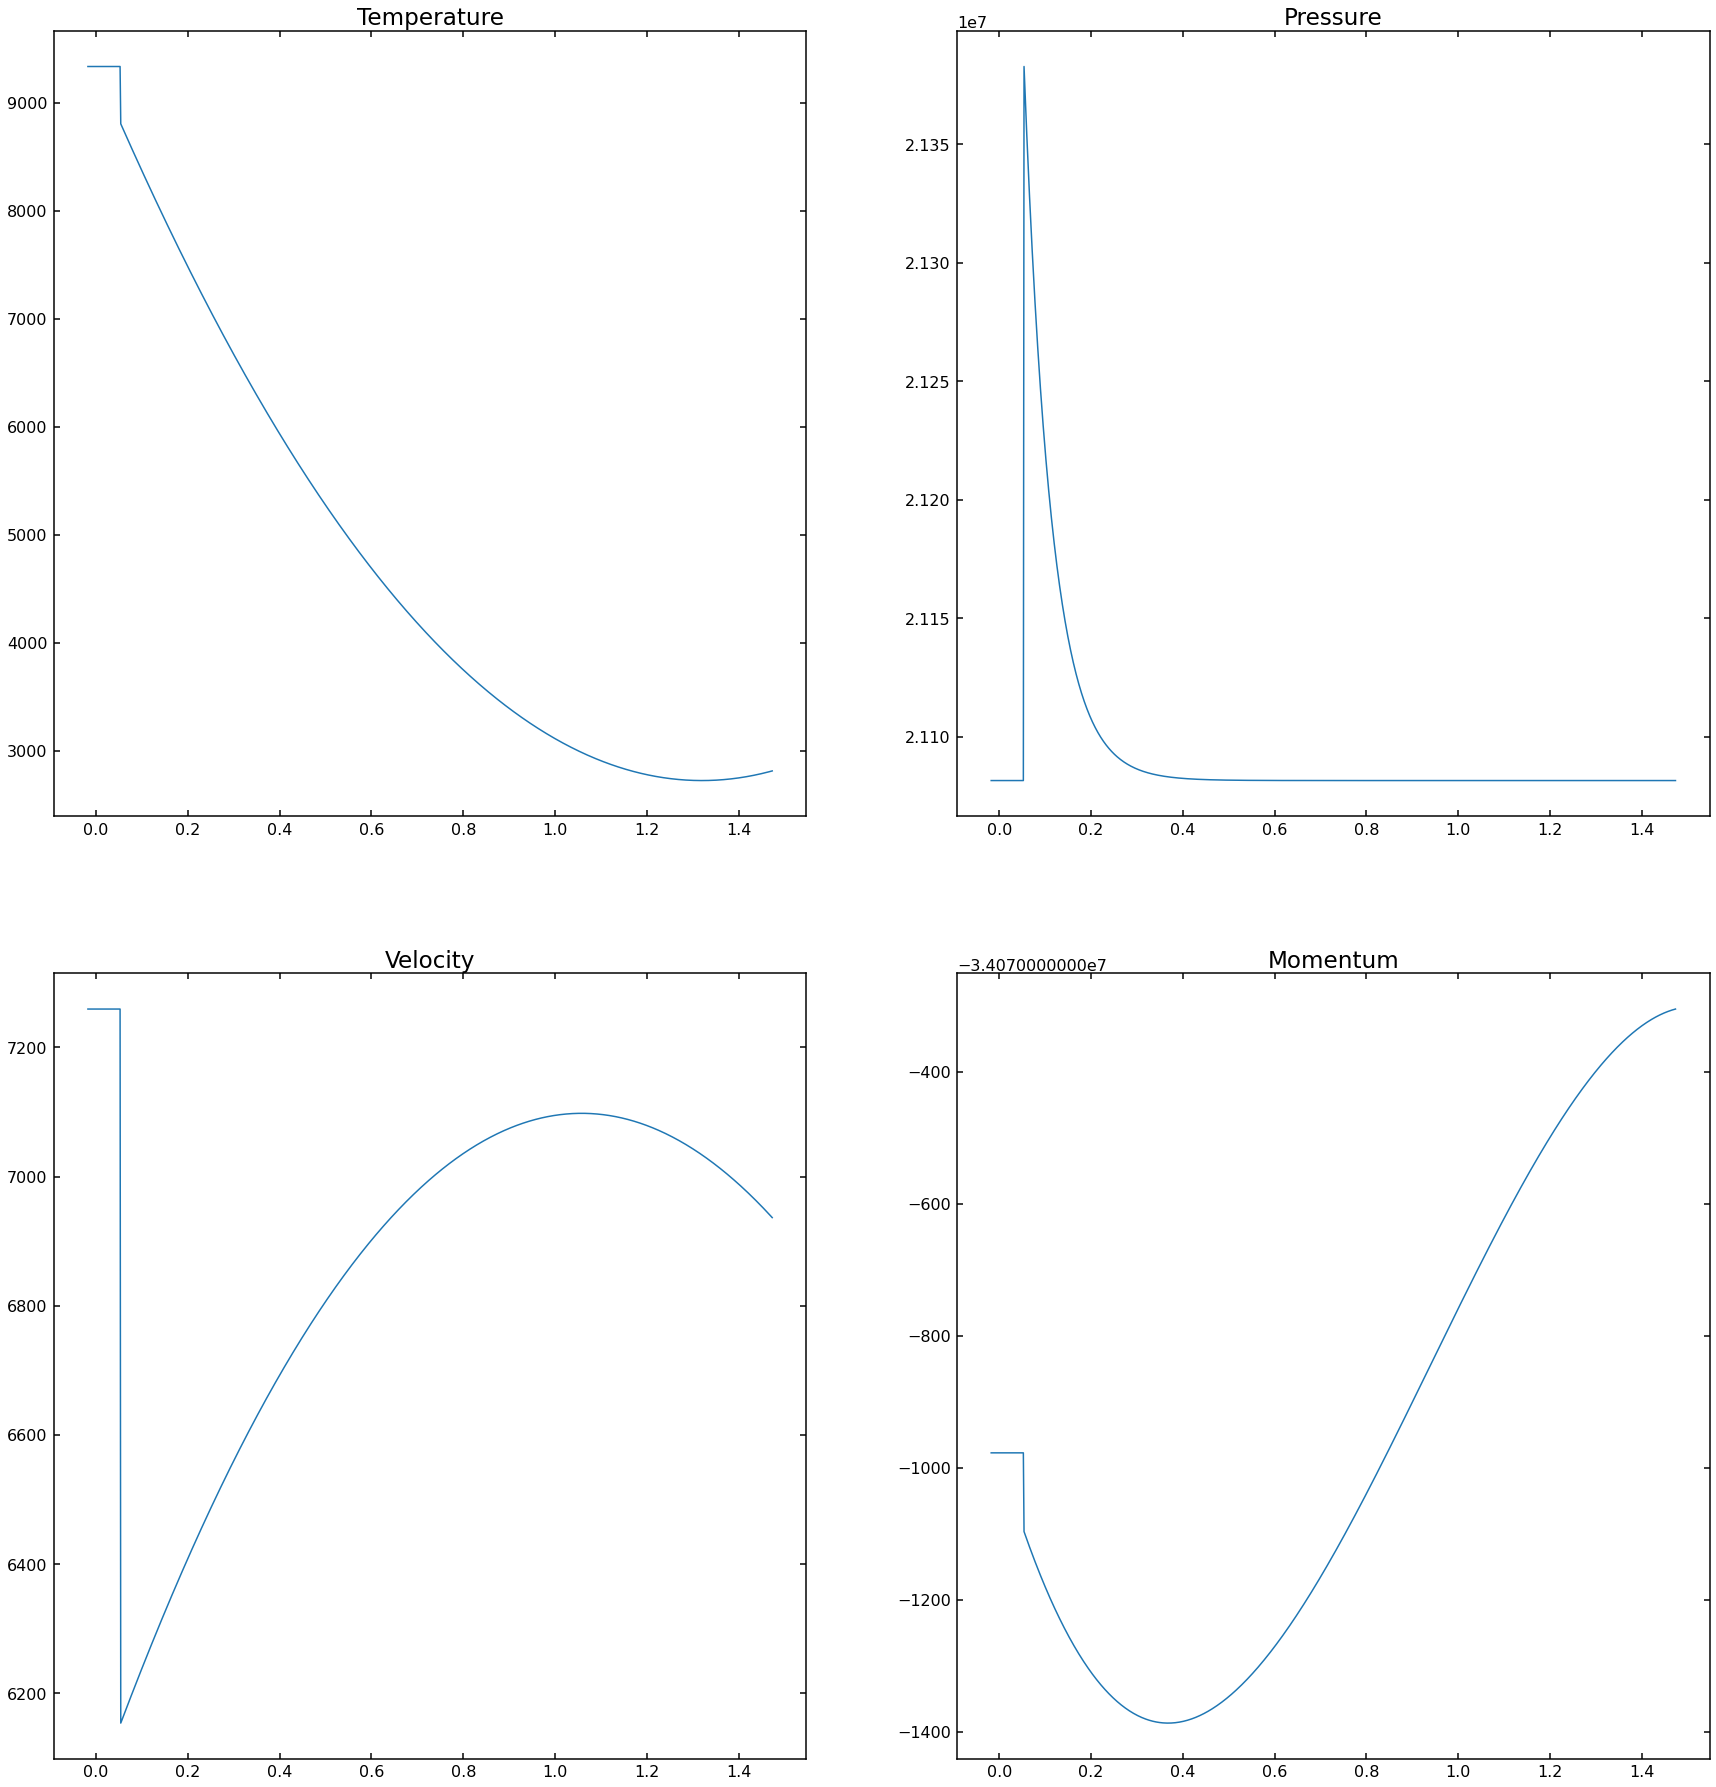

None
Wall time: 47.5 s


In [12]:
%%time
print(FuncSet1.multiplot())

283250.0
283250.0
283250.0
1001
283250.0
-0.017448
283250.0
-0.015958
283250.0
-0.014467
283250.0
-0.012977
283250.0
-0.011486
283250.0
-0.0099957
283250.0
-0.0085051
283250.0
-0.0070146
283250.0
-0.005524
283250.0
-0.0040335
283250.0
-0.0025429
283250.0
-0.0010524
283250.0
0.0004382
283250.0
0.0019288
283250.0
0.0034193
283250.0
0.0049099
283250.0
0.0064004
283250.0
0.007891
283250.0
0.0093815
283250.0
0.010872
283250.0
0.012363
283250.0
0.013853
283250.0
0.015344
283250.0
0.016834
283250.0
0.018325
283250.0
0.019815
283250.0
0.021306
283250.0
0.022797
283250.0
0.024287
283250.0
0.025778
283250.0
0.027268
283250.0
0.028759
283250.0
0.030249
283250.0
0.03174
283250.0
0.03323
283250.0
0.034721
283250.0
0.036211
283250.0
0.037702
283250.0
0.039193
283250.0
0.040683
283250.0
0.042174
283250.0
0.043664
283250.0
0.045155
283250.0
0.046645
283250.0
0.048136
283250.0
0.049626
283250.0
0.051117
283250.0
0.052608
283250.0
283250.0
283250.0
283250.0
283250.0
283250.0
283250.0
283250.0
283250.0
2

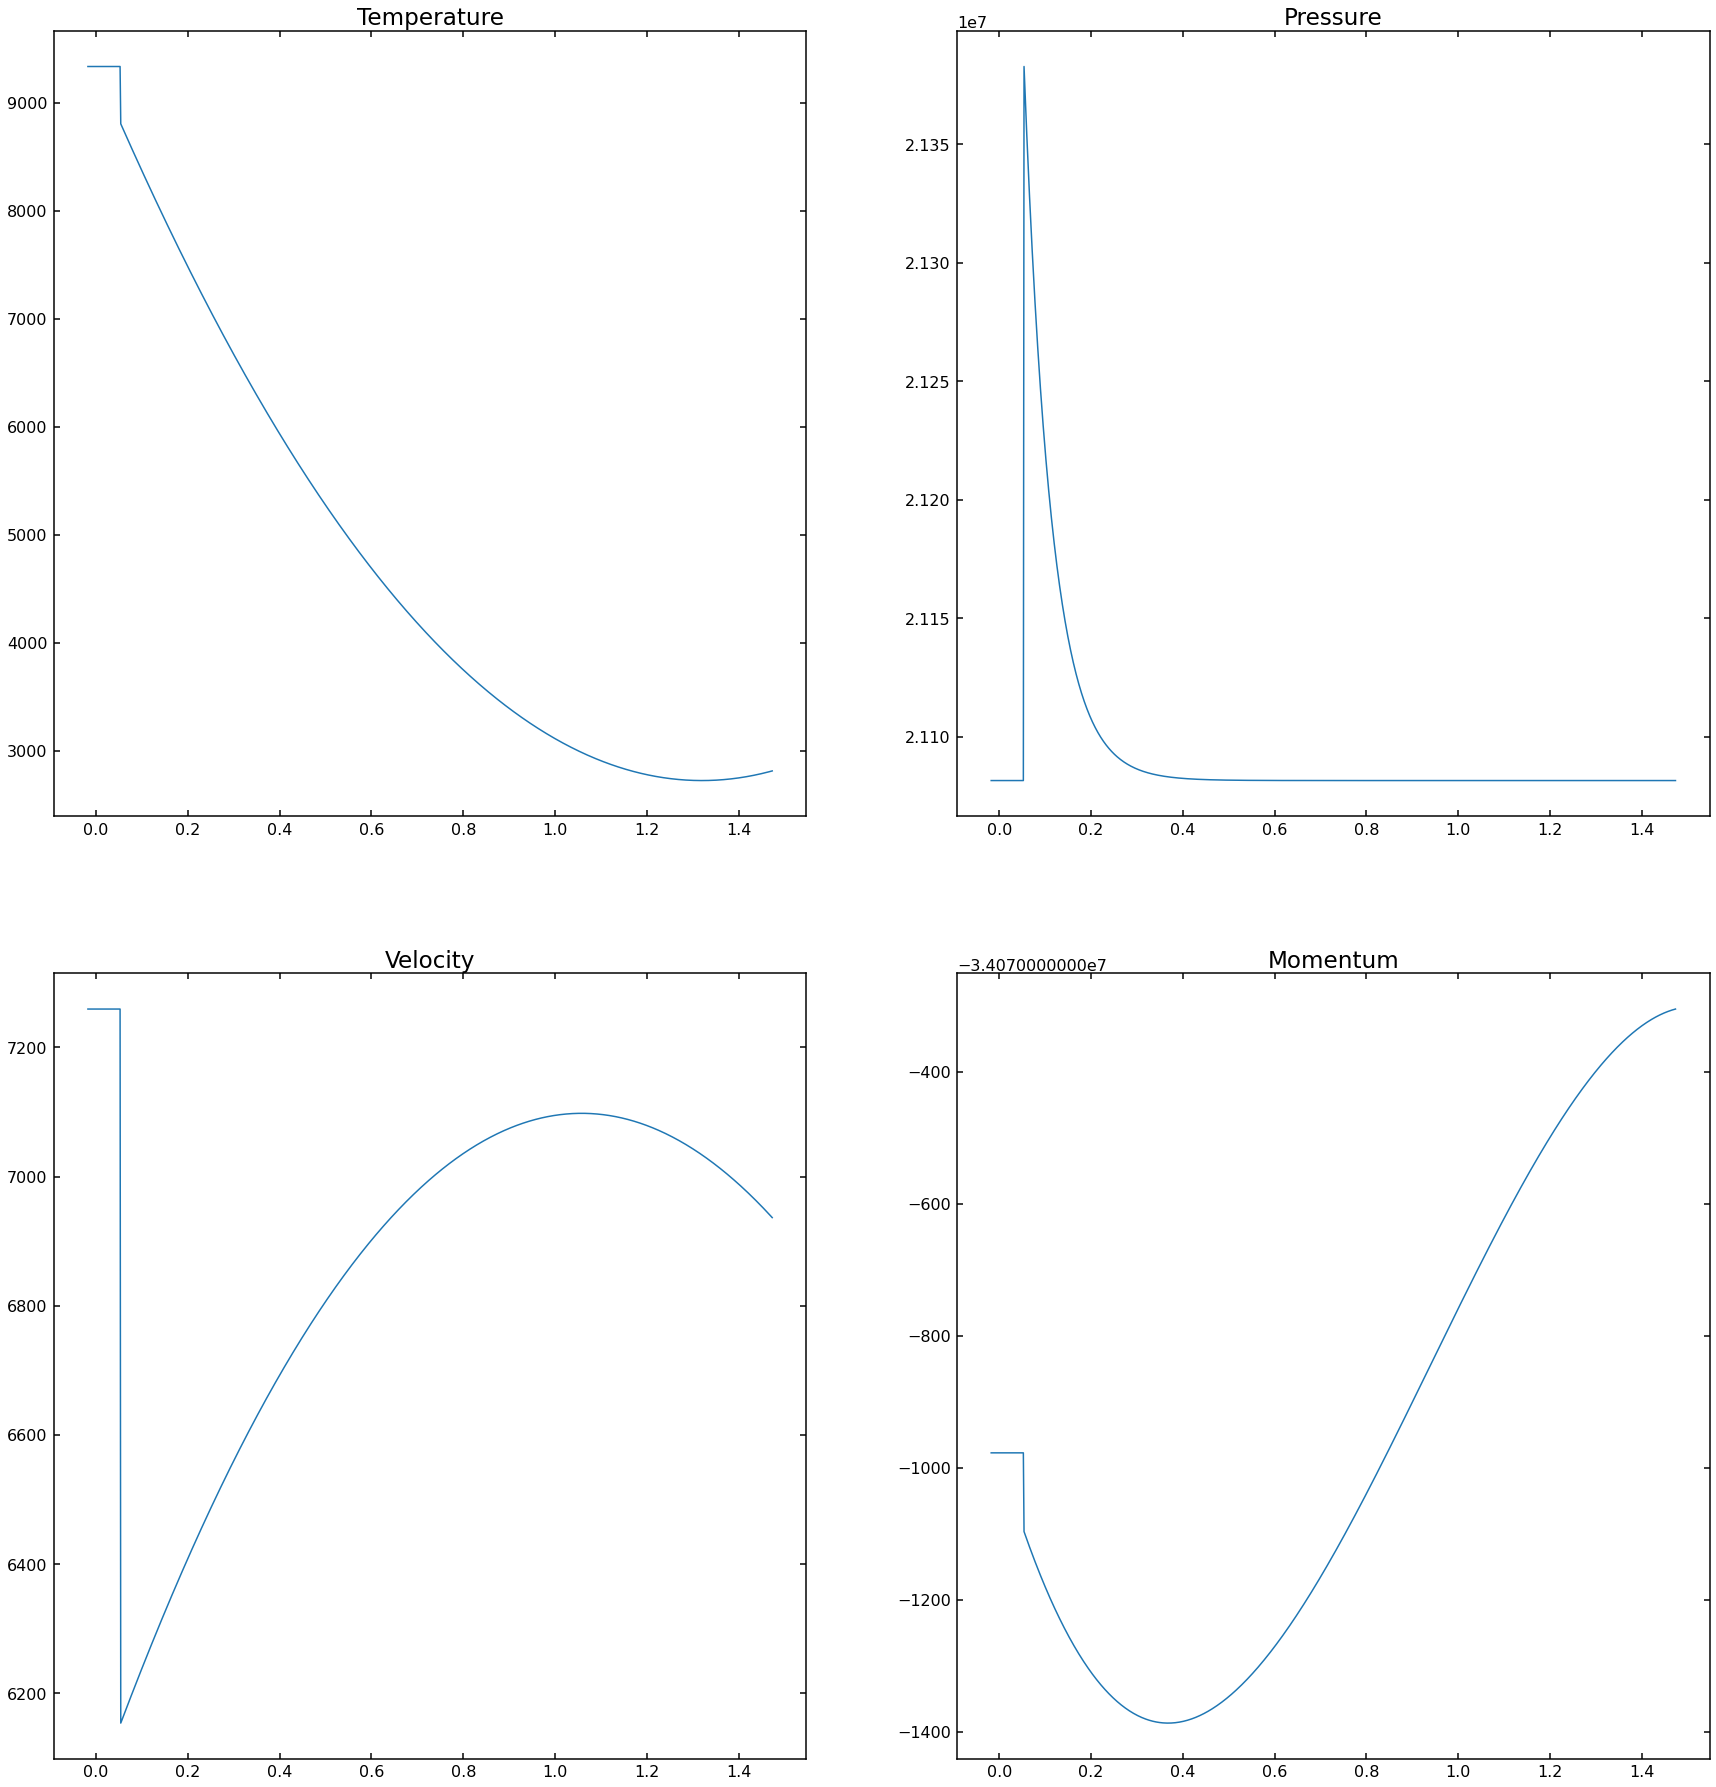

None


In [13]:
import timeit
start_time = timeit.default_timer()
print(FuncSet1.multiplot())
elapsed = timeit.default_timer() - start_time


In [14]:
print(elapsed)

48.239168800000016


In [15]:
def mag_calc_vel(df):
    mag_list_vel = []
    for i in range(0, len(df)):
        v_x = df['Velocity Mag:0']
        v_y = df['Velocity Mag:1']
        v_z = df['Velocity Mag:2']
        magnitude = np.sqrt(v_x[i]**2 + v_y[i]**2 + v_z[i]**2)
        print(magnitude)
        mag_list_vel.append(magnitude)
        
    return mag_list_vel

In [16]:
Validation_run = pd.read_csv('ValidationTest.csv')
validation_run_t = Validation_run['Temperature']
validation_run_p = Validation_run['Pressure']
validation_run_v = mag_calc_vel(Validation_run)

7633.0
7633.0
7633.0
7633.0
7633.0
7633.0
7633.0
7633.0
7633.0
7633.0
7633.0
7633.0
7633.0
7633.0
7633.0
7633.0
7633.0
7633.0
7633.0
7633.0
7633.0
7633.0
7633.0
7633.0
7633.0
7633.0
7633.0
7633.000000000005
7633.000000000036
7633.000000000108
7633.000000000802
7633.0000000000255
7633.000000001077
7633.000000002234
7633.00000002422
7633.100000350578
7633.100001461419
7632.900001970349
7632.800011269723
7633.000016897812
7540.927429264304
7277.398837018825
7009.212145884543
6772.723235336333
6599.848083744495
6504.6986267918055
6444.793514823644
6406.468498140116
6389.451670563709
6390.412652408961
6402.929740663235
6417.24940903548
6432.941513266229
6447.836170824802
6451.268579316726
6449.332670567941
6439.934931732135
6433.791495008487
6430.445447296142
6430.746378258313
6432.057295565052
6435.800034646579
6441.688190829326
6448.8587748293685
6456.99944751505
6465.741430973382
6474.8667453816
6484.073630829154
6493.411901304338
6502.466535877888
6510.484045114695
6518.3088745602645
65

In [17]:
def TempPredict_Val(T, x):
    #self.CalcStagVals()
    if x <= 0.05:
        TempScaled_Val = T
        #print(x)
    else:
        TempScaled_Val = ((3796 * x**2) - (1.002e+04 * x) + T)
    return TempScaled_Val
        
def PressPredict_Val(P, x):
    if x <= 0.05:
        PressScaled_Val = 0
    else:
        PressScaled_Val = (90000 * np.exp(-i / 40))
    return PressScaled_Val
        
def VelPredict_Val(V, x):
    if x <= 0.05:
        VelScaled_Val = V
    else:
        VelScaled_Val = ((-936.7 * x**2) + (1982 * x) + (V/1.2))
    return VelScaled_Val

In [18]:
print(VelPredict_Val(7600, 0.5))

7090.158333333334


In [19]:
TempTest_Validation = []

for i in range(0, len(extrapolate_run2_x)):
    #print(i)
    TempValue = TempPredict_Val(8100, extrapolate_run2_x[i])
    TempTest_Validation.append(TempValue)
# print(TempTest_Validation)
# print(len(extrapolate_run2_x))

PressureTest_Validation = []

for i in range(0, len(extrapolate_run2_x)):
    PressValue = PressPredict_Val(25000, extrapolate_run2_x[i])
    PressureTest_Validation.append(PressValue)
#print(len(PressureTest_Validation))

VelTest_Validation = []

for i in range(0, len(extrapolate_run2_x)):
    
    VelValue = VelPredict_Val(7600, extrapolate_run2_x[i])
    
    VelTest_Validation.append(VelValue)
print(VelTest_Validation)

[7600, 7600, 7600, 7600, 7600, 7600, 7600, 7600, 7600, 7600, 7600, 7600, 7600, 7600, 7600, 7600, 7600, 7600, 7600, 7600, 7600, 7600, 7600, 7600, 7600, 7600, 7600, 7600, 7600, 7600, 7600, 7600, 7600, 7600, 7600, 7600, 7600, 7600, 7600, 7600, 7600, 7600, 7600, 7600, 7600, 7600, 6432.199679233047, 6435.009976854665, 6437.814229104467, 6440.616200079433, 6443.41213126719, 6446.205775595504, 6448.993385721214, 6451.778703402877, 6454.557992466542, 6457.334983501553, 6460.10780981662, 6462.874615891532, 6465.639115559947, 6468.397600572813, 6471.153773594577, 6473.903937545397, 6476.651783920509, 6479.393626809283, 6482.133146537743, 6484.868501546259, 6487.597861446281, 6490.324889808146, 6493.045928646121, 6495.764630361334, 6498.477348137264, 6501.187723205825, 6503.892119919709, 6506.5941683416195, 6509.292052043584, 6511.983965768715, 6514.673522824029, 6517.357115487115, 6520.038345895777, 6522.722587916464, 6525.393686425334, 6528.060625798864, 6530.723406037054, 6533.382027139904, 65

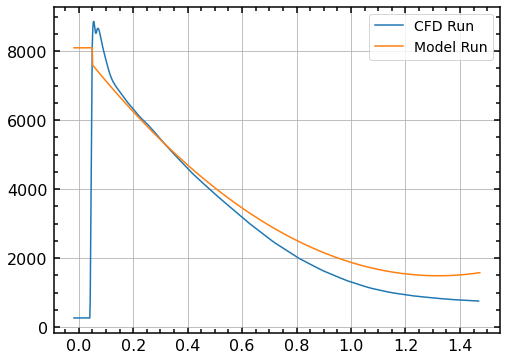

In [20]:
plt.plot(extrapolate_run2_x, validation_run_t)
plt.plot(extrapolate_run2_x, TempTest_Validation)
plt.grid()
plt.minorticks_on()
plt.legend(["CFD Run", "Model Run"], loc ="upper right", prop={'size': 14})

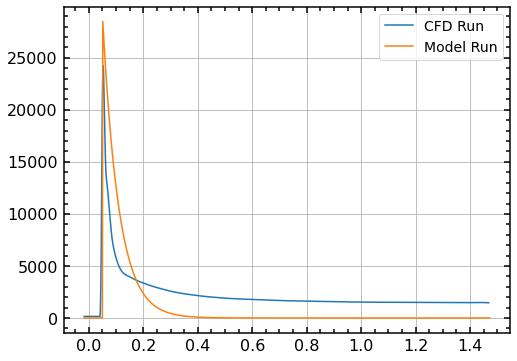

In [21]:
plt.plot(extrapolate_run2_x, validation_run_p)
plt.plot(extrapolate_run2_x, PressureTest_Validation)
plt.grid()
plt.minorticks_on()
plt.legend(["CFD Run", "Model Run"], loc ="upper right", prop={'size': 14})

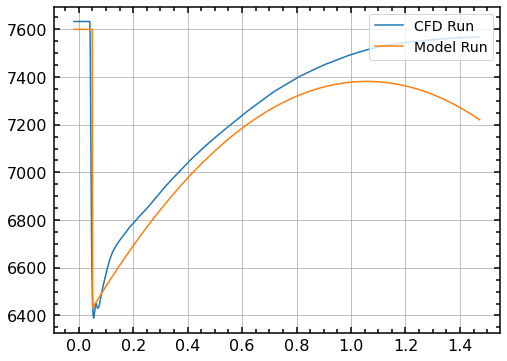

In [22]:
plt.plot(extrapolate_run2_x, validation_run_v)
plt.plot(extrapolate_run2_x, VelTest_Validation)
plt.grid()
plt.minorticks_on()
plt.legend(["CFD Run", "Model Run"], loc ="upper right", prop={'size': 14})

In [23]:
while True:
    dataset_name = (str(input("Input dataset name:  or type q to quit the program ")))
    if dataset_name == "q":
        break
    else:
        altitude = int(input("Input altitude in km: "))
        obj_name = RegimeFunctionBuilder(dataset_name, altitude)
        print("Input option: ")
        print("Help - 1")
        print("Predict on your dataset - 2")
        print("Predict and Plot your dataset - 3")
        choice = int(input("Input : "))
        #obj_name = RegimeFunctionBuilder(dataset_name, altitude)
        obj_name.funcCaller()
        if choice == 1:

            #print(obj_name.PrintInfo())
            print(obj_name._help())

        elif choice == 2:
            obj_name.params()
            obj_name.CalcStagVals()
            obj_name.Predictor()
            
        
        elif choice == 3:

            plot_y_n = str(input("Plot output? [Y/N] "))
            plot_y_n = plot_y_n.lower()
            if plot_y_n == "y" or plot_y_n == "yes":
                obj_name.multiplot()
                
                save_y_or_n = str(input("Save figure? [Y/N] "))
                save_y_or_n = save_y_or_n.lower()
                if save_y_or_n == "y" or plot_y_n == "yes":
                    plt.show()
                    #obj_name.multiplot()
                    plt.savefig('MultiPlot_Prediction.png', dpi=1200, format='png', bbox_inches='tight')
                else:
                    continue
            
        

Input dataset name:  or type q to quit the program q


In [13]:
root = tk.Tk()
#root = tk.Toplevel()
root.state('zoomed')
root.iconbitmap('Logo.ico')
root.title('SPAFF Model')
HEIGHT = 700
WIDTH = 1000
canvas = tk.Canvas(root, height=HEIGHT, width=WIDTH)
canvas.pack()

#background_image = tk.PhotoImage(file='cosmos-5809271_1920.png')
#image = Image.open("elmo-nuke.png")
#image= image.resize((34, 26), Image.ANTIALIAS)
#larger_image = image.zoom(2, 2)
background_image = tk.PhotoImage(file='gui_image.png',master=root)
background_label = tk.Label(root, image=background_image)
background_label.place(relwidth=1, relheight=1)

frame = tk.Frame(root, bg='#00688B', bd=5)
#frame = tk.Frame(root, bg='#80c1ff', bd=5)
frame.place(relx=0.5, rely=0.1, relwidth=0.75, relheight=0.4, anchor='n')

tk.Label(frame, text = "dataset: ").place(relwidth=0.3, relheight=0.1) 
tk.Label(frame, text = "altitude: ").place(relwidth = 0.3, relx=0.35, relheight=0.1) 
#tk.Label(frame, text = "object name: ").place(relx=0.7, relwidth=0.3, relheight=0.1)

# tk.Label(frame, text = "velocity:").place(relwidth=0.03, relheight=0.1, rely=0.15) 
# tk.Label(frame, text = "theta:").place(relx=0.21, relwidth=0.03, relheight=0.1, rely=0.15) 

# tk.Label(frame, text = 'Initial Velocity:').place(relwidth=0.03, relheight=0.1, rely=0.45)
# #tk.
data_s = tk.StringVar()

# entry_dataset_1 = tk.Entry(frame, font=40, textvariable=data_s)
# entry_dataset_1.place(relwidth=0.3, rely=0.2, relheight=0.1)

alt_var = tk.IntVar()

b = tk.Entry(frame, text="dataset", font=40)
b.place(relwidth=0.3, rely=0.2, relheight=0.1)
obj_str = str(b.get())

entry_altitude_1 = tk.Entry(frame, font=40,  textvariable=alt_var)
entry_altitude_1.place(relwidth=0.3, relx=0.35, rely=0.2, relheight=0.1)
# alt_var = float(entry_altitude_1.get())

# data_input = str(data_s.get())
# alt_input = float(alt_var.get())
# obj_name = RegimeFunctionBuilder(data_input, alt_input)



# obj_name = tk.Button(frame, text="Initialise Class", font=40, command=lambda: RegimeFunctionBuilder(str(b.get()), float(alt_var.get())))
# #b.pack()
# obj_name.place(relx=0.35, rely=0.5, relheight=0.1, relwidth=0.3)

#obj_name = RegimeFunctionBuilder(b.get(), alt_var.get())

# button_initialise = tk.Button(frame, text="Initialise Class", font=40, command=lambda: RegimeFunctionBuilder(str(b.get()), float(entry_altitude_1.get())))
# button_initialise.place(relx=0.35, rely=0.5, relheight=0.1, relwidth=0.3)

button_predict = tk.Button(frame, text="Predict Flowfield", font=40, command=lambda: obj_name.Predictor())
button_predict.place(relx=0.35, rely=0.7, relheight=0.1, relwidth=0.3)

button_plot = tk.Button(frame, text="Plot?", font=40, command=lambda: obj_name.multiplot())
button_plot.place(relx=0.35, rely=0.85, relheight=0.1, relwidth=0.3)


# entry_planet_1 = tk.Entry(frame, font=40, text='Planet')
# entry_planet_1.place(relwidth=0.15, relx=0.45, rely=0, relheight=0.1)

# entry_vi = tk.Entry(frame, font=40, text='initial velocity')
# entry_vi.place(relwidth=0.15, relx=0.05, rely=0.15, relheight=0.1)

# entry_theta_1 = tk.Entry(frame, font=40)
# entry_theta_1.place(relwidth=0.15, rely=0.15, relx =0.25, relheight=0.1)

# entry_vi_2 = tk.Entry(frame, font=40)
# entry_vi_2.place(relwidth=0.15, rely=0.3, relx=0.05, relheight=0.1)

# entry_vf = tk.Entry(frame, font=40)
# entry_vf.place(relwidth=0.15, rely=0.3, relx=0.25, relheight=0.1)

# entry_theta = tk.Entry(frame, font=40)
# entry_theta.place(relwidth=0.15, rely=0.3, relx =0.45, relheight=0.1)

# entry_planet1 = tk.Entry(frame, font=40)
# entry_planet1.place(relwidth=0.15, rely=0.6, relx=0.05,relheight=0.1)

# entry_planet2 = tk.Entry(frame, font=40)
# entry_planet2.place(relwidth=0.15, rely=0.6, relx=0.25,relheight=0.1)

# entry_parking_orbit = tk.Entry(frame, font=40)
# entry_parking_orbit.place(relwidth=0.15, rely=0.6, relx=0.45, relheight=0.1)

# #button_hohmann_1 = tk.Button(frame, text="Hohmann Transfer Delta-V", font=40, command=lambda: deltaV_1(float(entry_r1_1.get()), float(entry_r2_1.get()),Earth))
# button_hohmann_1 = tk.Button(frame, text="Hohmann Transfer Delta-V", font=40, command=lambda: deltaV_1(float(entry_r1_1.get()), float(entry_r2_1.get()),entry_planet_1.get()))
# button_hohmann_1.place(relx=0.7, rely=0, relheight=0.1, relwidth=0.3)

# button_normrad = tk.Button(frame, text="Normal/Radial Delta-V", font=40, command=lambda: NormRad(float(entry_vi.get()), float(entry_theta_1.get())))
# button_normrad.place(relx=0.7, rely=0.15, relheight=0.1, relwidth=0.3)

# button_normrad_diffV = tk.Button(frame, text="Normal/Radial Delta-V (Different velocities)", font=40, command=lambda: NormRad_TwoVel(float(entry_vi_2.get()),float(entry_vf.get()),float(entry_theta.get())))
# button_normrad_diffV.place(relx=0.7, rely=0.3, relheight=0.1, relwidth=0.3)

# button_plot = tk.Button(frame, font=40, text='Plot Radial/Normal Maneuvre Delta-V', command=lambda: NormRadPlot(float(1000)))
# button_plot.place(relwidth=0.3, rely=0.45, relx=0.7, relheight=0.1)

# button_delta_V = tk.Button(frame, font=40, text='Hohmann transfer Delta-V', command=lambda: Delta_v(entry_planet1.get(),entry_planet2.get(),float(entry_parking_orbit.get())))
# button_delta_V.place(relwidth=0.3, rely=0.6, relx=0.7, relheight=0.1)

# lower_frame = tk.Frame(root, bg='#00688B', bd=10)
# lower_frame.place(relx=0.5, rely=0.65, relwidth=0.25, relheight=0.2, anchor='n')

# label = tk.Label(lower_frame)
# label.place(relwidth=1, relheight=1)


root.mainloop()
data_input = str(data_s.get())
alt_input = float(alt_var.get())
obj_name = RegimeFunctionBuilder(data_input, alt_input)

*---------------------------------------- Flowfield Approximation Model ----------------------------------------*



FileNotFoundError: [Errno 2] No such file or directory: ''

In [ ]:
print(alt_var
     )